# 🧪 Image Segmentation Lab

**Introduction**

In this lab we are going to analyze the performance of some of the segmentation methods that have been studied. In particular, we will focus on some typical strategies based on the analysis of histograms (threshold-based techniques) and the analysis of the boundaries of the objects to segment (edge-based techniques).
To successfully overcome this lab, you will need to write several routines using Python code. Therefore, it is recommended to attend the laboratory with minimal knowledge of Python (read images, create figures to display images, use loops, etc.).
It is also recommended to review the theory corresponding to the threshold-based and edge-based segmentation techniques, since some of the routines to be implemented will consist in the implementation of the stages of some of these techniques.

**Initial instructions**

* Download the material corresponding to the laboratory (“material.zip”).
* Extract the folder “Material” into the .zip file to the Desktop (or wherever).
* This folder contains the following subfolders:
    * imgs: Set of images to segment throughout the lab.
    * sw: Set of routines that will be used throughout the lab. All new routines required throughout this lab should be stored in this subfolder.


## 1. Otsu Thresholding

In this lab, you will apply **Otsu’s method** for automatic thresholding to a set of grayscale images.
You will display the original image, the segmented result, and the histogram with the threshold marked.

✍️ Questions

For each image:

- Was the segmentation successful?
- Did the threshold clearly separate foreground and background?
- What limitations did you notice?

Write your answers below.


Processing: star.png

Processing: star2.png

Processing: square.png

Processing: head.png

Processing: sonnet.png

Processing: pencils.png


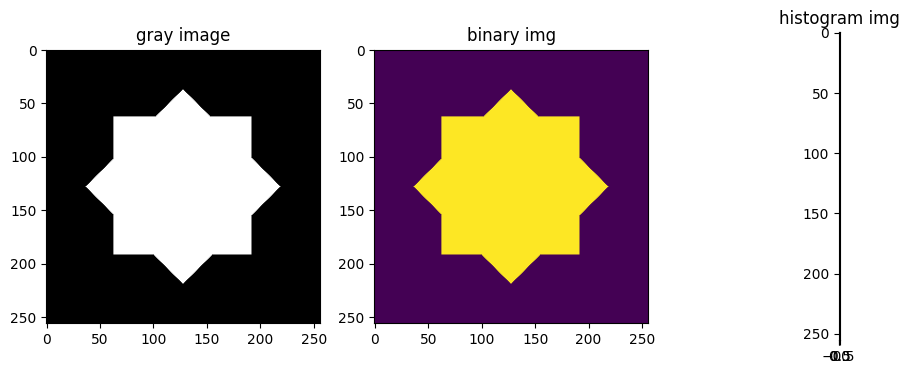

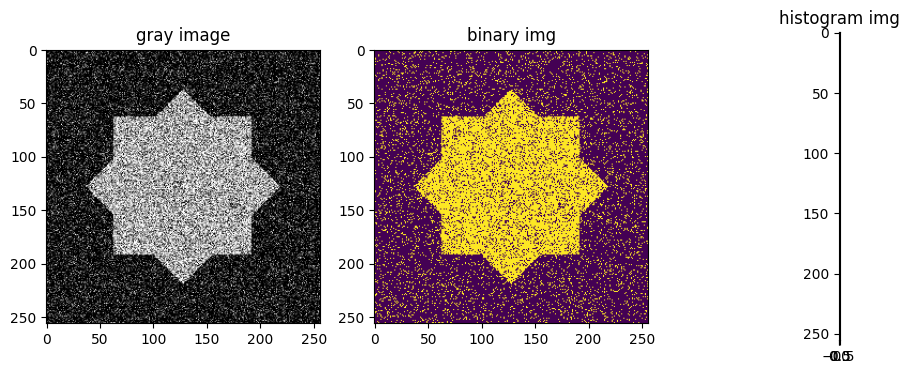

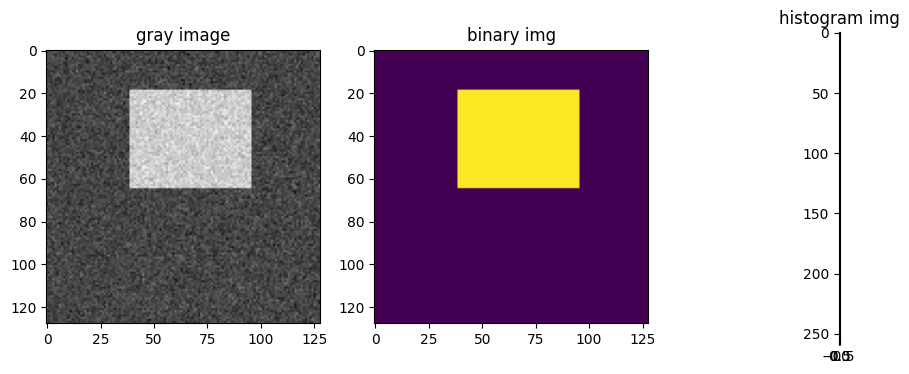

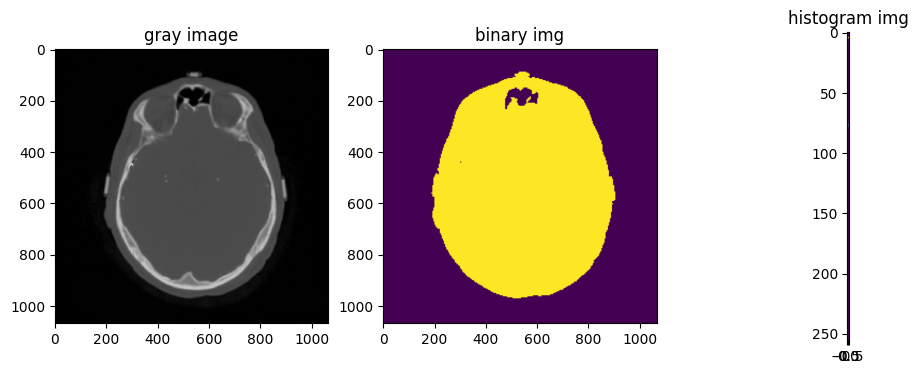

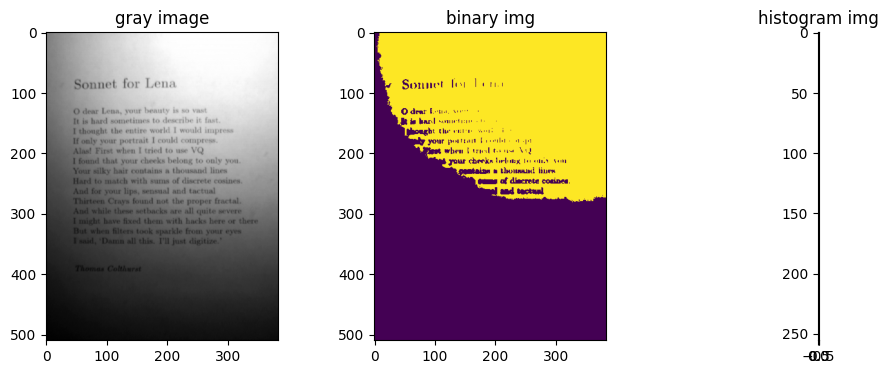

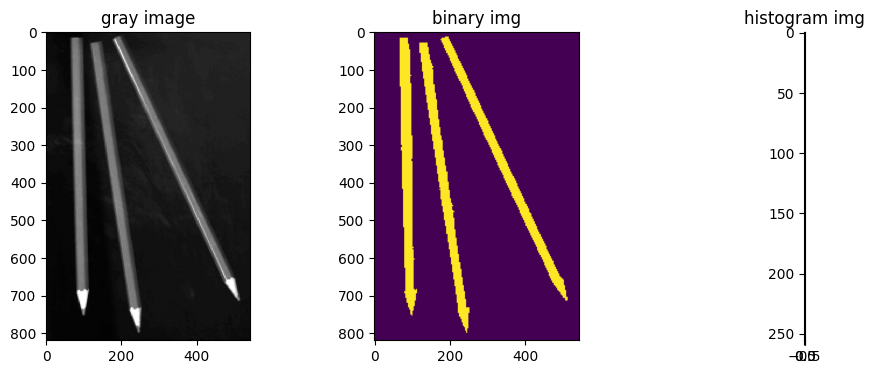

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_otsu
from pathlib import Path
import cv2

def otsu_threshold(image_path):

  # Load image in grayscale
  img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

  # Compute histogram (OpenCV)
  imghist = cv2.calcHist([img], [0], None, [256], [0, 256])

  # Normalize image to [0, 1] for threshold_otsu (expects float)
  threshold_val  = threshold_otsu(img /255.0) *255

  # Binarize image using threshold
  _, binImg = cv2.threshold(img, threshold_val, 255, cv2.THRESH_BINARY)

  # Plot everything
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  axes[0].imshow(img, cmap='gray')
  axes[0].set_title("gray image")
  axes[1].imshow(binImg)
  axes[1].set_title("binary img")
  axes[2].imshow(imghist)
  axes[2].set_title("histogram img")

# Path to your files (use sorted and glob to get all the images)
image_files = Path("/content/").glob("*.png")
#img_path =

for img_path in image_files:
    print(f"\nProcessing: {img_path.name}")
    otsu_threshold(img_path)


## 2. Local thresholding

Create the code for segmenting images using local thresholds (automatically
adapted to the characteristics of the neighborhood of each pixel). This code will be used to
segment the image “sonnet.png”. The stages of this routine must be the following:
* Read the image “sonnet.png”.
* Explore the image pixel by pixel.
    * i. For each pixel, compute the median grey value of its neighborhood: use
blocks of size (2n+1), where n must be set to 10.
    * ii. Use such median value for segmenting the pixels. That is, it the grey value of a
pixel is above the median computed for its neighborhood, the pixel is set to 1.
Otherwise, it is set to 0.
* Display the following:
    i. Original image.
    ii. Segmented image.
* Discuss the obtained result.
* Do you think it would be possible to easily improve this segmentation result? How?
    * Test and comment the result obtained after applying the improvement.
* Compare this result with that obtained using Otsu’s method.

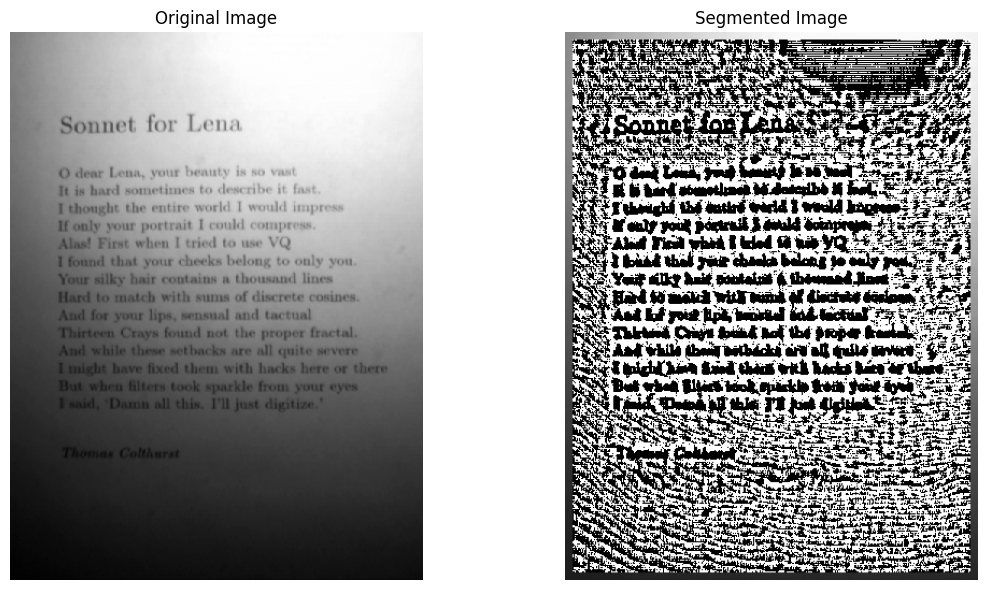

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = '/content/sonnet.png'  # Adjust the path if needed
I = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

# Set n for the size of the neighborhood
n = 7

# Iterate through the image pixel by pixel (ignoring the borders)
for i in range(n, I.shape[0] - n):
    for j in range(n, I.shape[1] - n):
        # Get the (2n+1)x(2n+1) block around the pixel
        A = I[i - n:i + n + 1, j - n:j + n + 1]

        # Compute the median of the block
        m = np.median(A)

        # Apply local thresholding
        if I[i, j] > m :
            # White
            I[i, j] = 255
        else:
            I[i, j] = 0# Black

# Ensure the image is back in uint8 for proper visualization
I = I.astype(np.uint8)

# Create a subplot with 1 row and 2 columns for original and segmented images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image on the first subplot
axs[0].imshow(cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE),cmap='gray' )
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the segmented image on the second subplot
axs[1].imshow(I, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Segmented Image')
axs[1].axis('off')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


## 3. Edge-based

Create the code which will allow segmenting objects by applying the “edge-based
segmentation” algorithm we have studied. This routine will be used for segmenting the image
“star.png” and its stages must be as follows:
* Read the image “star.png”.
* Obtain an edge image using the Sobel detector, SobelDetector(I,Th). This function returns
a binary image with ones in those pixels where the module of the computed gradient is
above threshold Th. Use Th = 0.05.
* Compute the Laplacian image of the original one. Note that the
image introduced in this second function must be in double format.
* Compute the sign of the Laplacian image (sign).
* Combine (multiply) the edge image and the sign of the Laplacian to obtain the image g.
* Initialize a final segmented image, I_out, with zero values. Explore the image g: row per
row from left to right.
    * For each image row, if two consecutive pixels have the values 1 and -1, from that
point the pixels in the I_out must be set to 1 until two consecutive pixels with
values -1 and 1 are found.
* Discuss the obtained result.

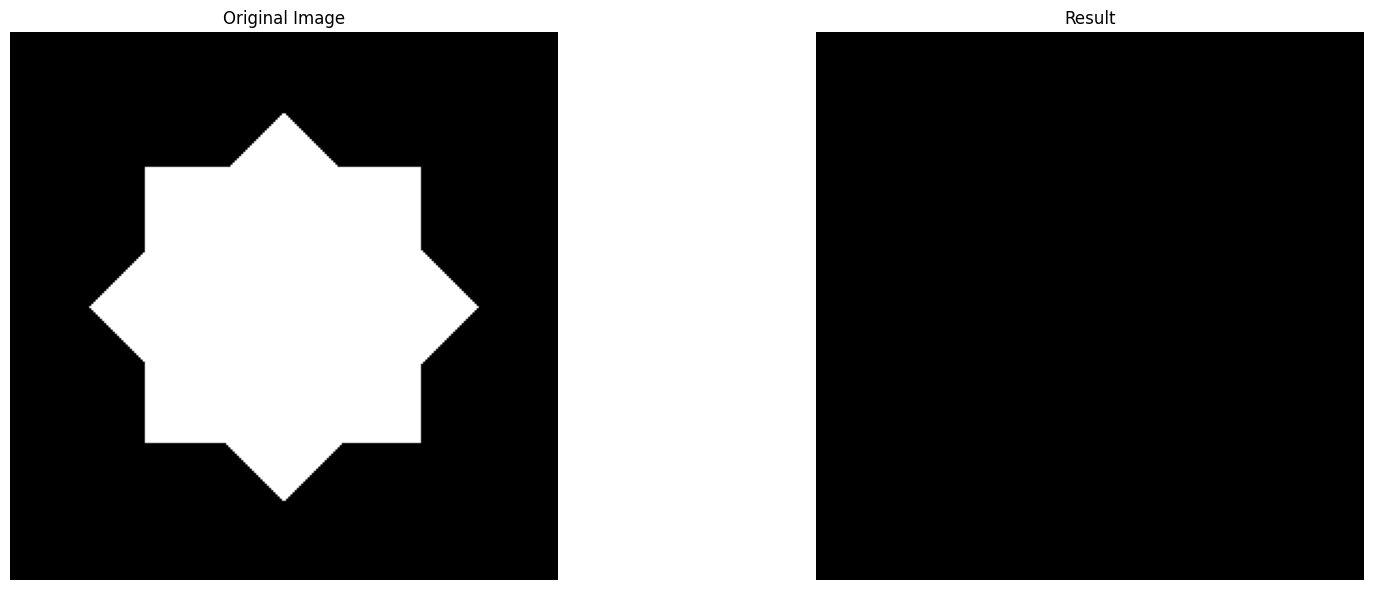

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image
image_path = '/content/star.png'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel-based edge detection (threshold = 0.05)
def SobelDetector(I, Th):
    I = I.astype(np.float32) / 255.0
    grad_x = cv2.Sobel(I, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(I, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    edge_binary = (gradient_magnitude > Th).astype(np.uint8)
    return edge_binary

th = 0.05
I_edge = SobelDetector(I, th)

# Convert to double
I_double = I.astype(np.float64) / 255.0
I_edge = I_edge.astype(np.float64)

# Compute Laplacian
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
I_lap = convolve(I_edge, laplacian_kernel , mode='reflect')

# Compute the sign of the Laplacian
sign_lap = np.sign(I_lap)

# Combine edge image and sign of Laplacian
g = sign_lap*I_edge

# Simulated ExploringRows function
def ExploringRows(g):
    I_out = np.zeros_like(g)
    for i in range(g.shape[0]):  # rows
        val = 0
        for j in range(g.shape[1]):  # columns
            prevVal = g[i,j-1 ]
            currVal = g[i,j ]
            if prevVal == 1 and currVal == -1:
                val = 1
            elif prevVal == -1 and currVal == 1:
                val = 0

    return I_out

result = ExploringRows(g)

# Display the original, result, and simulated ExploringRows result
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].imshow(I, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(result, cmap='gray')
axs[1].set_title('Result')
axs[1].axis('off')

plt.tight_layout()
plt.show()


## 4. Edge-based 2

Create the code to segment the image “star2.png”.
* Read the image “star2.png”.
* Obtain an edge image using the Sobel detector, SobelDetector(I,Th). This function returns
a binary image in which those pixels whose module of the computed gradient is above
threshold Th are set as 1. Use Th = 0.35.
* Compute the Hough transform of the edge image. Use the function [rho,theta] =
HoughTransform(I_Edges,NumLines,Display).
    * The input of this function is the following:
        1. I_Edges Edge image.
        2. NumLines Number of lines to identify from the transform.
        3. Display If it is set to one, the result of the transformation and the
identified peaks are illustrated in a figure.
    * The output of the function is:
        1. rho: List of rho values corresponding to the identified lines.
        2. theta: List of theta values corresponding to the identified lines.
* Compute the cut-points of each line with the boundaries of the image. Use the function
GetLineCuts.
* Obtain a binary image with the detected lines (using Breseham algorithm).
* Post processing:
    * Dilate the edge image (imdilate) using the following morphological structuring
element: se_dilate = strel(‘disk’,7).
    * Dilate the line image (imdilate) using the same morphological structuring
element.
    * Compute the intersection between both dilated images.
    * Erode the intersection image (imerode) using the following morphological
structuring element: se_erode = strel(‘disk’,5).
* Fill the holes using the function imfill with the argument ‘holes'.
* Display the following:
    * Original image.
    * Edge image.
    * Hough transform.
    * Line image.
    * All the post processing stages.
    * Final segmentation.
* Discuss the process and the results. Compare the results with those obtained using Otsu’s
method.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import line as bresenham_line
from skimage.morphology import disk, dilation, erosion
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.filters import sobel
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray

def sobel_detector(image, th=0.35):
    """Sobel edge detector implementation"""
    if len(image.shape) > 2:
        image = rgb2gray(image)
    sobel_img = sobel(image)
    binary_edges = sobel_img > th
    return binary_edges

def hough_transform(edge_image, num_lines=8, display=True):
    """Hough transform implementation"""
    tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
    h, theta, d = hough_line(edge_image, theta=tested_angles)

    if display:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        axes[0].imshow(edge_image, cmap='gray')
        axes[0].set_title('Edge Image')
        axes[0].set_axis_off()

        axes[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                      cmap='gray', aspect='auto')
        axes[1].set_title('Hough Transform')
        axes[1].set_xlabel('Angles (degrees)')
        axes[1].set_ylabel('Distance (pixels)')
        plt.tight_layout()
        plt.show()

    _, angles, dists = hough_line_peaks(h, theta, d, num_peaks=num_lines)
    return dists, angles

def pol2hom(theta, rho, dummy):
    """Convert polar coordinates to homogeneous line equation"""
    a = np.cos(theta)
    b = np.sin(theta)
    return np.array([a, b, -rho])

def get_image_cut(line_hom, rows, cols):
    """Find where a line cuts the image boundaries"""
    a, b, c = line_hom
    points = []

    # Check intersections with image borders (left, right, top, bottom)
    borders = [
        (0, None, lambda y: (-c - b * y) / a if a != 0 else None),  # left (x=0)
        (cols-1, None, lambda y: (-c - b * y) / a if a != 0 else None),  # right (x=cols-1)
        (None, 0, lambda x: (-c - a * x) / b if b != 0 else None),  # top (y=0)
        (None, rows-1, lambda x: (-c - a * x) / b if b != 0 else None)  # bottom (y=rows-1)
    ]

    for x_fixed, y_fixed, calc in borders:
        if x_fixed is not None:
            y = calc(x_fixed)
            if y is not None and 0 <= y < rows:
                points.append((x_fixed, y))
        else:
            x = calc(y_fixed)
            if x is not None and 0 <= x < cols:
                points.append((x, y_fixed))

    # Remove duplicate points and keep only 2 unique points
    unique_points = list(set(points))
    if len(unique_points) < 2:
        return np.array([[-1, -1], [-1, -1]])  # Invalid line

    # Return the first two points (should be enough for a line)
    return np.array([unique_points[0], unique_points[1]])

def get_line_cuts(image, rhos, thetas):
    """Python implementation of GetLineCuts"""
    rows, cols = image.shape[:2]
    line_cuts = []

    for rho, theta in zip(rhos, thetas):
        line_hom = pol2hom(theta, rho, 0)
        cut_points = get_image_cut(line_hom, rows, cols)

        # Skip invalid lines (marked by -1)
        if cut_points[0, 0] == -1:
            continue

        line_cuts.append(cut_points)

    if not line_cuts:
        return np.empty((2, 2, 0))

    return np.stack(line_cuts, axis=-1)

def refined_postprocessing(edge_img, line_mask,
                         edge_dilate_size=3,
                         line_dilate_size=5,
                         erode_size=3,
                         close_iterations=1):
    """
    Improved postprocessing with controllable parameters

    Parameters:
    - edge_dilate_size: Size of dilation for edges (smaller = less expansion)
    - line_dilate_size: Size of dilation for lines
    - erode_size: Size of erosion for intersection
    - close_iterations: Number of closing operations
    """
    # More conservative edge dilation
    edge_se = disk(edge_dilate_size)
    edge_dilate = dilation(edge_img, edge_se)

    # Slightly more aggressive line dilation
    line_se = disk(line_dilate_size)
    line_dilate = dilation(line_mask, line_se)

    # Intersection of dilated regions
    intersect = edge_dilate & line_dilate

    # Gentle erosion to clean up
    erode_se = disk(erode_size)
    intersect_erode = erosion(intersect, erode_se)

    # Apply proper hole filling
    from scipy.ndimage import binary_fill_holes
    # Convert to binary and fill holes
    filled = binary_fill_holes(intersect_erode).astype(np.uint8) * 255
    # Optional: Clean up small artifacts (similar to MATLAB's behavior)
    filled = cv2.morphologyEx(filled, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

    return {
        'edge_dilate': edge_dilate,
        'line_dilate': line_dilate,
        'intersect': intersect,
        'eroded': intersect_erode,
        'final': filled
    }

# Main processing
def main():
    # Read image
    img = cv2.imread('/content/star2.png')
    if img is None:
        raise FileNotFoundError("Image not found at '/content/star2.png'")

    # Convert to grayscale if needed
    if len(img.shape) > 2:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()

    # Edge detection
    th = 0.35
    edge_img = sobel_detector()

    # Hough transform
    num_lines = 8
    display = True
    rhos, thetas = hough_transform()

    # Get line cuts with image boundaries
    line_cuts = get_line_cuts()

    # Create line mask using Bresenham's algorithm
    line_mask = np.zeros_like(img_gray, dtype=bool)
    for i in range(line_cuts.shape[2]):
        pt1, pt2 = line_cuts[:, :, i]
        x0, y0 = int(round(pt1[0])), int(round(pt1[1]))
        x1, y1 = int(round(pt2[0])), int(round(pt2[1]))

        # Generate line coordinates
        rr, cc = bresenham_line()

        # Keep coordinates within image bounds
        valid = (rr >= 0) & (rr < img_gray.shape[0]) & (cc >= 0) & (cc < img_gray.shape[1])
        line_mask[rr[valid], cc[valid]] = True

    # Postprocessing with refined parameters
    results = refined_postprocessing(
        edge_img,
        line_mask,
        edge_dilate_size=,
        line_dilate_size=,
        erode_size=,
        close_iterations=
    )

    # Plotting
    plt.figure(figsize=(20, 10))

    plt.subplot(241)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(242)
    plt.imshow(edge_img, cmap='gray')
    plt.title('Edge Image')
    plt.axis('off')

    plt.subplot(243)
    plt.imshow(line_mask, cmap='gray')
    plt.title('Line Image')
    plt.axis('off')

    plt.subplot(244)
    plt.imshow(results['edge_dilate'], cmap='gray')
    plt.title('Edge dilate')
    plt.axis('off')

    plt.subplot(245)
    plt.imshow(results['line_dilate'], cmap='gray')
    plt.title('Line dilate')
    plt.axis('off')

    plt.subplot(246)
    plt.imshow(results['intersect'], cmap='gray')
    plt.title('Intersection')
    plt.axis('off')

    plt.subplot(247)
    plt.imshow(results['eroded'], cmap='gray')
    plt.title('Erosion')
    plt.axis('off')

    plt.subplot(248)
    plt.imshow(results['final'], cmap='gray')
    plt.title('Final segmentation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()